In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [73]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import (
    beta,
    norm,
    describe,
)

sys.path.append('../giggle')
from data import (
    load_data,
    describe_data,
    plot_counts,
    plot_rating_hist,
)

In [68]:
data = load_data()

## A first peak at the data-set

We start by looking at some basics statistics of the dataset: the number of ratings, the number of users and the number of jokes.

As a first observation:

- There are much more users than jokes in the dataset.

In [69]:
describe_data(data)

Number of ratings    1761439
Number of users        59132
Number of jokes          140


Next we look at how many ratings each user gave and how many ratings each joke has. We plot the number of ratings grouped by the `user_id` and `joke_id` respectively. The users and jokes are sorted in reversed order of the number of jokes that there are associated with them.

Conclusions:

- There is a single user that rated all 140 jokes
- Most of the users rated less than a third of jokes
- About 10 jokes were rated by almost all the users
- Most of the jokes were rated by less than half of the users

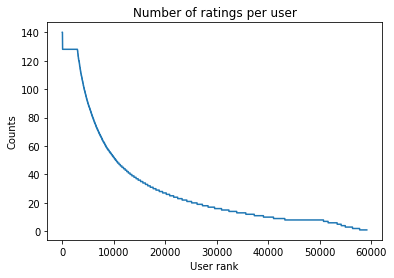

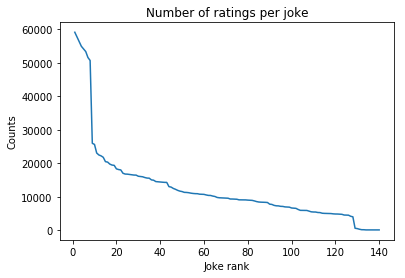

In [74]:
plot_counts(data)

Next we look at the distribution of the ratings. We plot a histogram of 1761439 ratings. 

Conclusions:

- The ratings are in the [-10, +10] range
- The distribution looks multi-modal, with modes around -10, +1, +10.
- The distribution looks skewed towards the positive ratings—the users were generally mildly amused

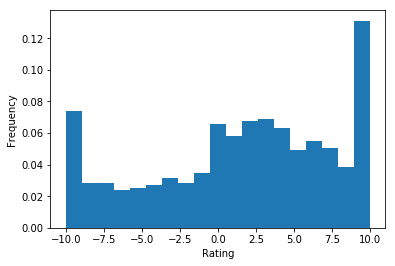

In [19]:
plot_rating_hist(data)

A more precise description of the data:

In [66]:
data.rating.describe()

count    5000.000000
mean        1.524600
std         5.819636
min       -10.000000
25%        -3.000000
50%         2.000000
75%         6.000000
max        10.000000
Name: rating, dtype: float64

## Fitting a Gaussian distribution to the rating distribution

We could try to model the rating distribution using the most widely-used distribution: the Gaussian distribution. To do that, we perform maximum-likelihood estimateion (MLE) to learn the parameters of the Gaussian distribution: the mean $\mu$ and the variance $\sigma$. We already obtained the MLE values in the above table: $\mu = 1.5$ and $\sigma = 5.8$. If we overlay the MLE Gaussian fit on top of the normalized histogram, we notice that the fit doesn't model the data well because the data is multi-modal, while the Gaussian is uni-modal.

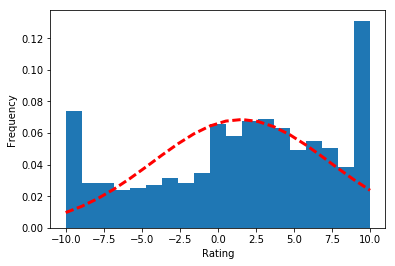

In [38]:
mu, sigma = norm.fit(data.rating)
n, bins, patches = plot_rating_hist(data)
y = norm.pdf(bins, mu, sigma)
_ = plt.plot(bins, y, 'r--', linewidth=3)

## Fitting a scaled beta distribution to the ratings

We now try to fit a more flexible distribution: the [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution). The Beta distribution fits uniform probability for most of the rating interval and gives higher probability to the two extremes.

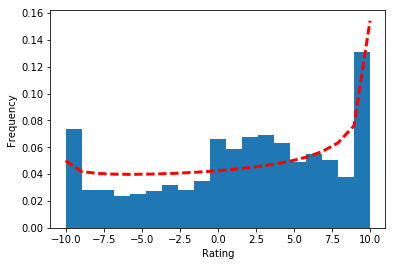

In [64]:
eps = 10 ** -1
min_rating = data.rating.min() - eps
max_rating = data.rating.max() + eps
a, b, loc, scale = beta.fit(data.rating, floc=min_rating, fscale=max_rating - min_rating)
n, bins, patches = plot_rating_hist(data)
y = beta.pdf(bins, a, b, loc, scale)
_ = plt.plot(bins, y, 'r--', linewidth=3)

Here are are the parameters of the Beta distribution.

In [65]:
print(a, b, loc, scale)

0.921367753113 0.708945718208 -10.1 20.2
